# Hyperparameter Tuning

**In this webinar:**
1. Hyperparameter tuning
2. Some commonly-used hyperparameters
3. GridSearchCV

**Objectives:**
- Understand the value of hyperparameter tuning in model optimisation
- Understand the code application of GridSearch

## Hyperparameter tuning

- Parameters that specify details of the model's learning process 
- Hyperparameters are usually specified before the training process
- Values are not learned from the data
- Finding **optimal** values can vastly improve model performance

## Some common hyperparameters

### Logistic Regression

`penalty`: {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

- Specify the norm of the penalty

`C` positive float, default=1.0

- Inverse of regularization strength. Smaller values specify stronger regularization.

`multi_class`: {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’


### Decision Tree Classifier

`max_depth`: int, default=None

- The maximum depth of the tree

`min_samples_leaf`: int or float, default=1

- The minimum number of samples required to be at a leaf node

`max_features`: int, float or {“auto”, “sqrt”, “log2”}, default=None

- The number of features to consider when looking for the best split

![](https://1329420134-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LagOeJ2nL90MQERwhxy%2F-LjmGR4-Zkpsp-CXV3zt%2F-Lk-zlkug29fjZ6T44mL%2Fimage.png?alt=media&token=f775f1ce-2256-4172-af1b-e66e916ec127)

### Random Forest Classifier

`n_estimators`: int, default=100

- The number of trees in the forest

`max_depth`: int, default=None

- The maximum depth of the tree

`bootstrap`: bool, default=True

- Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.


![](https://miro.medium.com/v2/resize:fit:1358/1*i69vGs4AfhdhDUOlaPVLSA.png)

### K Nearest Neighbor Classifier

`n_neighbors`: int, default=5

- Number of neighbors to use by default for kneighbors queries

`weights`: {‘uniform’, ‘distance’}, callable or None, default=’uniform’

- Weight function used in prediction

`metric`: str or callable, default=’minkowski’

- Metric to use for distance computation.

![](https://www.researchgate.net/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png)


**Bonus**: Check out the documentation for [SVC]() and [Naive Bayes]() classifiers to explore the parameters that can be tuned


## Tuning some hyperparameters - an example!

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [14]:
df_reviews = pd.read_csv('amazon_reviews.csv')
df_reviews = df_reviews.drop(columns = 'Unnamed: 0').dropna() 

df_reviews.head()

,overall,reviewText
0,4,kids like story BUT while i really wanted a bo...
1,4,Bought this used and it came in great conditio...
2,5,Every story and book about Corduroy is Fantast...
3,5,I purchased this book for my first grade class...
4,5,Having spent numerous years in an elementary s...


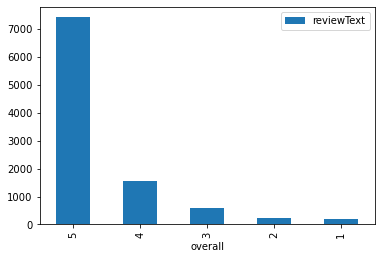

In [15]:
# Let's look at the distribution of ratings in our data

ratings = df_reviews[['overall', 'reviewText']].groupby('overall').count()

ratings.sort_values('overall', ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# Try out some more NLP steps to see if it improves any of them models' performance!

In [ ]:
# Remove punctuation
# Un-comment some of the below code to help you

#import string
#print(string.punctuation)

# Try creating a function for this and applying it to the dataframe!:

#def punctuation_remover(email):
#    ...

In [ ]:
# Tokenise the data
# Un-comment some of the below code to help you

#from nltk.tokenize import TreebankWordTokenizer

#tokeniser = ...
#df['column'] = ...

In [ ]:
# Lemmatise the words
# Un-comment some of the below code to help you


#from nltk.stem import WordNetLemmatizer
#import nltk
#nltk.download('wordnet')

#lemmatizer = ...
# apply it to your dataframe!

In [ ]:
# Join the individual words back together to form sentences again, so they can be passed through the Vectoriser

# Hint: use the .join() method to help you!

In [16]:
# Create a CountVectorizer instance 
vectorizer = CountVectorizer(stop_words = 'english')


# Fit and transform the documents, set up X and y
X = vectorizer.fit_transform(df_reviews['reviewText'])
y = np.array(df_reviews['overall'])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [ ]:
# Let's say we want to see the difference in performance of four random forest models
# with a different number of estimators:

rf1 = RandomForestClassifier(n_estimators = 10, random_state = 27)

rf2 = RandomForestClassifier(n_estimators = 50, random_state = 27)

rf3 = RandomForestClassifier(n_estimators = 75, random_state = 27)

rf4 = RandomForestClassifier(n_estimators = 100, random_state = 27)

In [17]:
# that was a lot of repetition...how can we make it easier?

est = [10, 50, 75, 100]

results = []

for x in est:
    print("Fitting RF model with n_estimators = {:d}".format(x))
    
    rf = RandomForestClassifier(n_estimators = x, random_state = 27)
    
    rf.fit(X_train, y_train)
    
    y_preds = rf.predict(X_test)
    
    f1_test = metrics.f1_score(y_test, y_preds, average='weighted')
    
    results.append([x, f1_test])
    
results = pd.DataFrame(results, columns=['n_estimators', 'f1 score'])

Fitting RF model with n_estimators = 10
Fitting RF model with n_estimators = 50
Fitting RF model with n_estimators = 75
Fitting RF model with n_estimators = 100


In [18]:
results

,n_estimators,f1 score
0,10,0.681193
1,50,0.673331
2,75,0.670630
3,100,0.672813


In [20]:
# But now what if we also want to play around with the max_depth? [1, 3, 5, 7]
# We could do the same as above, but we're going to have to do so many different combos
# How many combos?

depths = [1, 3, 5, 7]
max_features = [2, 3, 4, 5]

for x in est: 
    for y in depths:
        for z in max_features:
            print(x, y, z)

10 1 2
10 1 3
10 1 4
10 1 5
10 3 2
10 3 3
10 3 4
10 3 5
10 5 2
10 5 3
10 5 4
10 5 5
10 7 2
10 7 3
10 7 4
10 7 5
50 1 2
50 1 3
50 1 4
50 1 5
50 3 2
50 3 3
50 3 4
50 3 5
50 5 2
50 5 3
50 5 4
50 5 5
50 7 2
50 7 3
50 7 4
50 7 5
75 1 2
75 1 3
75 1 4
75 1 5
75 3 2
75 3 3
75 3 4
75 3 5
75 5 2
75 5 3
75 5 4
75 5 5
75 7 2
75 7 3
75 7 4
75 7 5
100 1 2
100 1 3
100 1 4
100 1 5
100 3 2
100 3 3
100 3 4
100 3 5
100 5 2
100 5 3
100 5 4
100 5 5
100 7 2
100 7 3
100 7 4
100 7 5


## Instead, let's automate this with GridSearchCV!

We can automate the process without having to write so much code to go through each set of hyperparameters, or set up a very intricate set of for-loops to go through combinations of different hyperparameters. sklearn's GridSearchCV does all this for us!

GridSearchCV works in the following way:
- You (the user) define a set of hyperparameters to tune, and the values you want to test
- Define a score function to evaluate the performance of each hyperparameter combination
- Perform a grid search over all possible combinations of hyperparameters and evaluate with cross validation
- Select the best hyperparameter combination based on the evaluation metric specified

In [21]:
from sklearn.model_selection import GridSearchCV

Syntax for GridSearchCV:

```python

GridSearchCV(estimator/model, param_grid, scoring = metric, cv = 5)
```

*  **estimator** is your model


*  **param_grid** is where you can set up all the hyperparameter values you want to try out. It is written in the form of a dictionary:

```python
{'hyperparam_1': [values],

'hyperparam_2': [values]}
```


*  **scoring** is where you define the metric you want to evaluate your model's performance on


*  **cv** is where you can define how many cross-fold validations you want GridSearch to use when deciding on the best model and parameters

In [22]:
param_grid = {'n_estimators': [10, 50, 75, 100]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state = 27), 
                       param_grid, 
                       scoring = 'f1_weighted', 
                       cv = 3)

grid_rf.fit(X_train, y_train)

grid_rf.best_params_

{'n_estimators': 10}

Now let's try adding in max_features to see what the best combination is!

In [23]:
feats = ["sqrt", "log2"]

param_grid = {'n_estimators': [10, 50, 75, 100], 
              'max_features': ["sqrt", "log2"]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state = 27), 
                       param_grid, 
                       scoring = 'f1_weighted', 
                       cv = 3)

grid_rf.fit(X_train, y_train)

grid_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 10}

Once we've done all we want to with GridSearchCV and we've got a set of our best performing parameters, GridSearchCV actually stores these for us to immediately make predictions with if we need to!:

In [24]:
grid_preds = grid_rf.predict(X_test)

print(metrics.classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           1       0.57      0.09      0.15        45
           2       0.33      0.11      0.16        55
           3       0.21      0.10      0.14       109
           4       0.32      0.17      0.22       299
           5       0.78      0.93      0.85      1492

    accuracy                           0.73      2000
   macro avg       0.44      0.28      0.30      2000
weighted avg       0.67      0.73      0.68      2000



We can have a look at all of the resutls from the GridSearch using the `.cv_results_` method, put into a dataframe:

In [26]:
param_results = pd.DataFrame(grid_rf.cv_results_)

In [27]:
param_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.860211,0.033952,0.017174,0.000587,sqrt,10,"{'max_features': 'sqrt', 'n_estimators': 10}",0.677590,0.671922,0.681914,0.677142,0.004092,1
1,4.315842,0.108015,0.075932,0.000417,sqrt,50,"{'max_features': 'sqrt', 'n_estimators': 50}",0.673586,0.674166,0.663366,0.670373,0.004960,2
2,6.467961,0.104287,0.111313,0.001198,sqrt,75,"{'max_features': 'sqrt', 'n_estimators': 75}",0.673951,0.675124,0.661790,0.670288,0.006028,3
3,8.557406,0.047571,0.148765,0.000764,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.668871,0.674705,0.664134,0.669237,0.004323,4
4,1.105796,0.016654,0.026841,0.000044,log2,10,"{'max_features': 'log2', 'n_estimators': 10}",0.667364,0.669414,0.661788,0.666189,0.003223,5
5,5.598654,0.232837,0.122998,0.001346,log2,50,"{'max_features': 'log2', 'n_estimators': 50}",0.659345,0.663014,0.654040,0.658800,0.003684,6
6,8.291831,0.098999,0.182493,0.001789,log2,75,"{'max_features': 'log2', 'n_estimators': 75}",0.660250,0.661240,0.652586,0.658026,0.003867,7
7,11.230484,0.391035,0.247425,0.003651,log2,100,"{'max_features': 'log2', 'n_estimators': 100}",0.658979,0.661127,0.651326,0.657144,0.004207,8


GridSeachCV can be a very useful tool for us to optimise our model and experiment with multiple parameters in one go, without having to type out a large amount of code. What is important to note though is that the more we are adding to our GridSearch, the longer it may take to run!

---

## Exercises!

1. True or False: GridSearch can only optimise for one hyperparameter at a time

2. What does the `n_neighbors` hyperparameter mean in a KNN model?

3. What is the difference between upsampling and downsampling?

4. Can we specify the hyperparameter C to be -1.00 with a Logistic Regression model?

5. How does K-Fold validation allow us to evaluate our model?

6. True or False: Backward stepwise selection starts with an empty set of features and iteratively adds the most significant variable until a criterion is met

---

## Answers below!

1. False - we can specifiy values for multiple parameters to search through with GridSearch, using our parameter grid (param_grid)


2. `n_neighbors` allows us to specify how many datapoints we want the model to identify as 'nearest neighbors' to use in order to classify our new data point into a class


3. Upsampling increases the size of a smaller class through sampling and duplication, downsampling decreases the size of a larger class through sampling


4. No we cannot - the value of C needs to be a **positive** float


5. K-Fold validation tries different train/test splits of our data. It splits our training data into K 'folds', and each 'fold' is given a chance at being the holdout group (X_test) that we evaluate our model's performance on. The performance across these different folds is then examined to see how consistent our model is performing across different holdout groups. Normally, the mean and standard deviation of our evaluation metric is taken across these K folds to give us an average score.


6. False - backwards stepwise selection starts with all features included in the model, and iteratively removes the least significant or important variable one at a time, until we reach a criterion or peak model performance.